In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [4]:
from sklearn.preprocessing import OneHotEncoder

cat_cols=['Pop','sex']

ohe=OneHotEncoder(drop='first',handle_unknown='ignore')
data =ohe.fit_transform(df[cat_cols]).toarray()
ohe_cols = ohe.get_feature_names_out(cat_cols)

ohe_df =pd.DataFrame(data,columns=ohe_cols,index=df.index)

num_df =df.drop(cat_cols,axis=1)

df_final=pd.concat([ohe_df,num_df],axis=1)


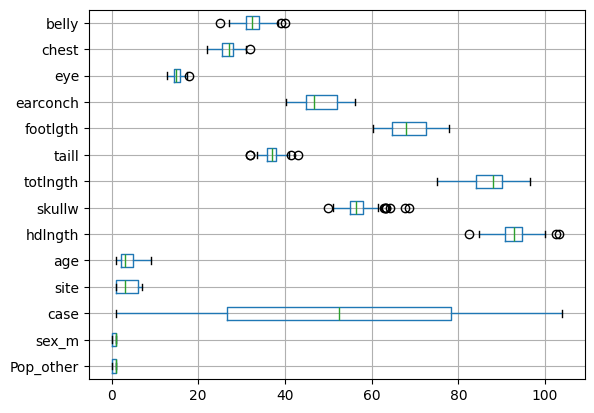

In [5]:
df_final.select_dtypes(include="number").boxplot(vert=False)
plt.show()

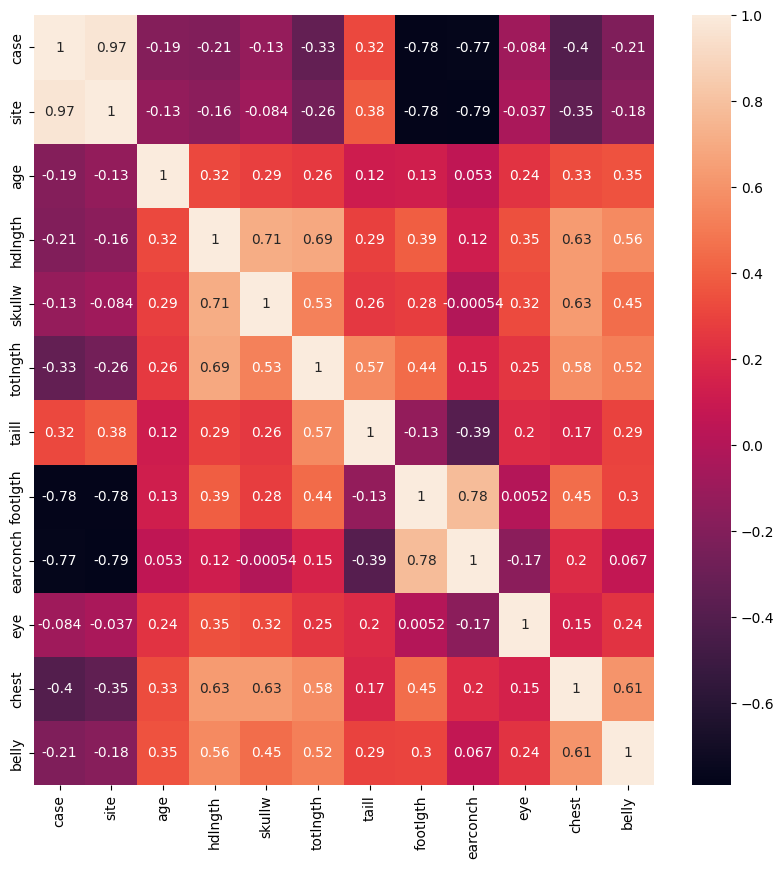

In [6]:
df_numcols=df.select_dtypes(include="number")
plt.figure(figsize=(10,10))
sns.heatmap(df_numcols.corr(),annot=True)
plt.show()

In [7]:
df_final.columns

Index(['Pop_other', 'sex_m', 'case', 'site', 'age', 'hdlngth', 'skullw',
       'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

prediction of headlength by total length using decision tree

In [8]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


x=df_final[['Pop_other', 'sex_m', 'age', 'skullw',
       'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]
y=df_final['hdlngth']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)


DecisionTreeRegressor()

In [9]:

y_pred=dt.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


mae =mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
rmse= np.sqrt(mse)
r2 =r2_score(y_pred,y_test)

print("mae",mae)
print("mse",mse)
print("rsme",rmse)
print("r2",r2)



mae 2.095238095238096
mse 8.068571428571435
rsme 2.8405230906597883
r2 0.48026513746191335


Now using linear regression

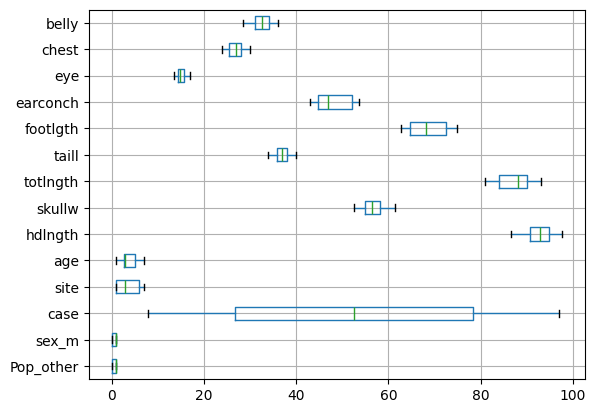

In [10]:
from scipy.stats.mstats import winsorize

for i in df_final.columns:
    df_numcols[i] =winsorize(df_final[i],limits=[0.07,0.07])

df_final.select_dtypes(include="number").boxplot(vert=False)
plt.show()

In [11]:
xx=df_final.drop(['site','case','hdlngth'],axis=1)
yy= df_final['hdlngth']

XX_train,XX_test,yy_train,yy_test=train_test_split(xx,yy,test_size=0.25,random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

lr=LinearRegression()
lr.fit(XX_train,yy_train)





LinearRegression()

In [12]:
ls=Lasso(alpha=0.007609689349112425)
ls.fit(XX_train,yy_train)

Lasso(alpha=0.007609689349112425)

In [13]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=100).fit(xx, yy)

print("Best alpha:", lasso_cv.alpha_)

Best alpha: 0.007609689349112425


In [14]:
las_pred=ls.predict(XX_test)
mae =mean_absolute_error(las_pred,yy_test)
mse = mean_squared_error(las_pred,yy_test)
rmse= np.sqrt(mse)
r2 =r2_score(las_pred,yy_test)

print("mae",mae)
print("mse",mse)
print("rsme",rmse)
print("r2",r2)


mae 1.207188903149101
mse 2.4574494262027327
rsme 1.5676254100398899
r2 0.6085207365480634


In [15]:
yy_pred=lr.predict(XX_test)

mae =mean_absolute_error(yy_pred,yy_test)
mse = mean_squared_error(yy_pred,yy_test)
rmse= np.sqrt(mse)
r2 =r2_score(yy_pred,yy_test)

print("mae",mae)
print("mse",mse)
print("rsme",rmse)
print("r2",r2)


mae 1.209895384236432
mse 2.456397419933905
rsme 1.567289832779472
r2 0.6092448936498629


Classification 

In [16]:
df_final.columns

Index(['Pop_other', 'sex_m', 'case', 'site', 'age', 'hdlngth', 'skullw',
       'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [21]:
from sklearn.tree import DecisionTreeClassifier
cols=['Pop_other', 'sex_m','age', 'hdlngth', 'skullw',
       'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
x1=df_final.drop(cols,axis=1)
y1=df_final['age']

x_train,x_test,Y_train,Y_test=train_test_split(x1,y1,test_size=0.25,random_state=1)
dt2=DecisionTreeClassifier()
dt2.fit(x_train,Y_train)


DecisionTreeClassifier()

In [22]:
dt_pred=dt2.predict(x_test)
print(classification_report(dt_pred,Y_test))
print("accuracy score: ",accuracy_score(dt_pred,Y_test))
print("confusion matrix:\n",confusion_matrix(dt_pred,Y_test))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00         1
         3.0       0.25      0.18      0.21        11
         4.0       0.00      0.00      0.00         2
         5.0       0.50      1.00      0.67         1
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         4

    accuracy                           0.12        26
   macro avg       0.11      0.17      0.13        26
weighted avg       0.12      0.12      0.11        26

accuracy score:  0.11538461538461539
confusion matrix:
 [[0 1 4 1 0 1 0]
 [0 0 0 0 0 1 0]
 [0 4 2 3 1 0 1]
 [0 1 0 0 0 0 1]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0]
 [1 1 2 0 0 0 0]]


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [19]:
from sklearn.linear_model import LogisticRegression

logr =LogisticRegression()
logr.fit(x_train,Y_train)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
logr_pred=logr.predict(x_test)
print(classification_report(logr_pred,Y_test))
print("accuracy score: ",accuracy_score(logr_pred,Y_test))
print("confusion matrix:\n",confusion_matrix(logr_pred,Y_test))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0
         3.0       1.00      0.32      0.48        25
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0

    accuracy                           0.31        26
   macro avg       0.14      0.05      0.07        26
weighted avg       0.96      0.31      0.47        26

accuracy score:  0.3076923076923077
confusion matrix:
 [[0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0]
 [1 7 8 4 2 1 2]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz